In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# **Loading data in pandas**

In [3]:
from google.colab import files

uploaded = files.upload()

Saving cards_data.csv to cards_data (1).csv
Saving transactions_data.csv to transactions_data.csv
Saving users_data.csv to users_data.csv


In [7]:
#Loading data in pandas
uploaded.keys()
transactions_df = pd.read_csv('transactions_data.csv')
users_df = pd.read_csv('users_data.csv')
cards_df = pd.read_csv('cards_data.csv')

In [8]:
#Checking datatypes of each columns
users_df.info()
transactions_df.info()
cards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 25 non-null     int64  
 1   current_age        25 non-null     int64  
 2   retirement_age     25 non-null     int64  
 3   birth_year         25 non-null     int64  
 4   birth_month        25 non-null     int64  
 5   gender             25 non-null     object 
 6   address            25 non-null     object 
 7   latitude           25 non-null     float64
 8   longitude          25 non-null     float64
 9   per_capita_income  25 non-null     object 
 10  yearly_income      25 non-null     object 
 11  total_debt         25 non-null     object 
 12  credit_score       25 non-null     int64  
 13  num_credit_cards   25 non-null     int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 2.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 

# **TASK A- Data Pre-Processing**

1. Ensure Numeric values for core continuous columns. If not numeric then
convert them into appropriate int and float datatypes.

2. Check Data Hygiene throughout the data e.g. Turn “amount” column (with '$'
signs) into a clean number column.

3. Check how many duplicate rows are there, handle them.

4. Display number and columns having missing values. Also visualize and then
finally handle them with appropriate action.

5. Convert the use_chip column to have only three values: swipe, chip, or online.

6. How can you clean up city names, so they don’t have extra spaces and always
start with capital letters?

7. Make sure state codes are always two capital letters (like CA, NY)?

8. How do you turn ZIP codes into a proper 5-digit string, keeping leading zeros?

In [42]:
#1. Ensure Numeric values for core continuous columns. If not numeric then convert them into appropriate int and float datatypes.
#2. Check Data Hygiene throughout the data e.g. Turn “amount” column (with $signs) into a clean number column. “$46.26” ---🡪 46.26
transactions_df['amount'] = (
    transactions_df['amount']
    .replace('[\$,]', '', regex=True)
    .astype(float)
)
numeric_columns = ['per_capita_income', 'yearly_income', 'total_debt']
for col in numeric_columns:
    users_df[col] = (
        users_df[col]
        .replace('[\$,]', '', regex=True)
        .astype(float)
    )
cards_df['credit_limit'] = (
    cards_df['credit_limit']
    .replace('[\$,]', '', regex=True)
    .astype(float)
)

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:14: SyntaxWarning: invalid escape sequence '\$'
<>:21: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:14: SyntaxWarning: invalid escape sequence '\$'
<>:21: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3706639157.py:5: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)
/tmp/ipython-input-3706639157.py:14: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)
/tmp/ipython-input-3706639157.py:21: SyntaxWarning: invalid escape sequence '\$'
  .replace('[\$,]', '', regex=True)


,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295.0,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,21968.0,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,46414.0,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,12400.0,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,28.0,09/2008,2009,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,3679,1946,Visa,Debit,4869845530765333,08/2024,701,YES,2,4488.0,07/2002,2015,No
71,5701,1946,Visa,Credit,4231526239204033,02/2020,499,YES,2,12500.0,11/2014,2014,No
72,4510,1674,Mastercard,Debit,5813611925507601,12/2020,734,YES,2,23432.0,09/2001,2008,No
73,2873,1674,Amex,Credit,366520954874839,05/2022,447,YES,2,8800.0,05/2005,2011,No


In [44]:
transactions_df.info()
users_df.info()
cards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              50000 non-null  int64  
 1   date            50000 non-null  object 
 2   client_id       50000 non-null  int64  
 3   card_id         50000 non-null  int64  
 4   amount          50000 non-null  float64
 5   use_chip        50000 non-null  object 
 6   merchant_id     50000 non-null  int64  
 7   merchant_city   50000 non-null  object 
 8   merchant_state  50000 non-null  object 
 9   zip             50000 non-null  object 
 10  mcc             50000 non-null  int64  
 11  errors          50000 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 4.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----  

In [10]:
# 3. Check how many duplicate rows are there, handle them.
print("Duplicates in USERS data:", users_df.duplicated().sum())
print("Duplicates in CARDS data:", cards_df.duplicated().sum())
print("Duplicates in TRANSACTIONS data:", transactions_df.duplicated().sum())

# Check for duplicate IDs (should be unique)
print("\nDuplicate user IDs:", users_df['id'].duplicated().sum())
print("Duplicate card IDs:", cards_df['id'].duplicated().sum())
print("Duplicate transaction IDs:", transactions_df['id'].duplicated().sum())

# Remove duplicates if any found
users_df = users_df.drop_duplicates()
cards_df = cards_df.drop_duplicates()
transactions_df = transactions_df.drop_duplicates()

# Reconfirm
print("\nAfter cleanup:")
print("Users:", users_df.duplicated().sum())
print("Cards:", cards_df.duplicated().sum())
print("Transactions:", transactions_df.duplicated().sum())

Duplicates in USERS data: 0
Duplicates in CARDS data: 0
Duplicates in TRANSACTIONS data: 0

Duplicate user IDs: 0
Duplicate card IDs: 0
Duplicate transaction IDs: 0

After cleanup:
Users: 0
Cards: 0
Transactions: 0


MISSING VALUE SUMMARY

Users Data:
id                   0
current_age          0
retirement_age       0
birth_year           0
birth_month          0
gender               0
address              0
latitude             0
longitude            0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
num_credit_cards     0
dtype: int64

Cards Data:
id                       0
client_id                0
card_brand               0
card_type                0
card_number              0
expires                  0
cvv                      0
has_chip                 0
num_cards_issued         0
credit_limit             0
acct_open_date           0
year_pin_last_changed    0
card_on_dark_web         0
dtype: int64

Transactions Data:
id                0
date              0
client_id         0
card_id           0
amount            0
use_chip          0
merchant_id       0
merchant_city     0
merchant_state    0
zip               0
mcc               0
errors       

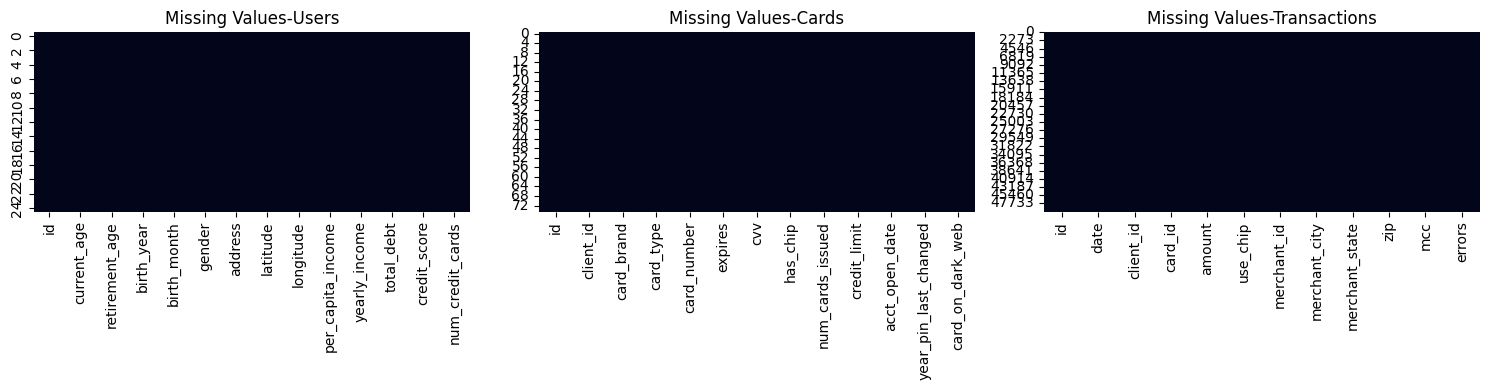

/tmp/ipython-input-1761232568.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions_df['merchant_state'].fillna("00", inplace=True)
/tmp/ipython-input-1761232568.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [14]:
# 4. Display number and columns having missing values. Also visualize and then finally handle them with appropriate action.

print("MISSING VALUE SUMMARY")
print("\nUsers Data:")
print(users_df.isnull().sum())

print("\nCards Data:")
print(cards_df.isnull().sum())

print("\nTransactions Data:")
print(transactions_df.isnull().sum())

# Step 4.2 — Visualize missing data using heatmaps
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.heatmap(users_df.isnull(), cbar=False)
plt.title("Missing Values-Users")

plt.subplot(1, 3, 2)
sns.heatmap(cards_df.isnull(), cbar=False)
plt.title("Missing Values-Cards")

plt.subplot(1, 3, 3)
sns.heatmap(transactions_df.isnull(), cbar=False)
plt.title("Missing Values-Transactions")

plt.tight_layout()
plt.show()

# Missing Value Handling in transactions_df
# Fill missing merchant_state with "Unknown"
transactions_df['merchant_state'].fillna("00", inplace=True)

# Fill missing ZIP with "00000"
transactions_df['zip'].fillna("00000", inplace=True)
transactions_df['zip'] = transactions_df['zip'].astype(str).str.zfill(5)

# Fill missing errors with "None"
transactions_df['errors'].fillna("None", inplace=True)

In [19]:
# 5. Convert the use_chip column to have only three values: swipe, chip, or online.
# 6. How can you clean up city names, so they don’t have extra spaces and always start with capital letters?
# 7. Make sure state codes are always two capital letters (like CA, NY)?
# 8. How do you turn ZIP codes into a proper 5-digit string, keeping leading zeros?

transactions_df['use_chip'] = (
    transactions_df['use_chip']
    .astype(str)
    .str.strip()
    .str.lower()
    .replace({
        'swipe transaction': 'swipe',
        'online transaction': 'online',
        'chip transaction': 'chip'
    })
)

transactions_df['merchant_state'] = (
    transactions_df['merchant_state']
    .astype(str)
    .str.strip()
    .str.upper()
    .str[:2]
)

transactions_df['zip'] = (
    transactions_df['zip']
    .astype(str)
    .str.extract(r'(\d+)')[0]
    .fillna("00000")
    .str.zfill(5)
)

transactions_df['zip'] = (
    transactions_df['zip']
    .astype(str)
    .str.extract(r'(\d+)')[0]
    .fillna("00000")
    .str.zfill(5)
)
transactions_df

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475509,2010-01-01 04:45:00,1718,4706,46.21,online,15143,ONLINE,00,00000,4784,None
1,7475582,2010-01-01 06:03:00,511,974,3.33,swipe,20519,Phoenix,AZ,85015,5942,None
2,7475752,2010-01-01 06:52:00,1718,2029,10.60,swipe,20519,Spring Valley,CA,91977,5942,None
3,7475819,2010-01-01 07:08:00,511,1038,21.50,swipe,79038,Phoenix,AZ,85015,7538,None
4,7475828,2010-01-01 07:09:00,1094,3755,80.00,swipe,27092,Boyne City,MI,49712,4829,None
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,11865834,2012-10-29 10:45:00,153,107,137.14,swipe,7777,Los Angeles,CA,90005,3684,None
49996,11865927,2012-10-29 11:04:00,1718,5144,12.09,swipe,23695,West Covina,CA,91792,5411,None
49997,11866093,2012-10-29 11:42:00,153,107,43.31,swipe,94123,Page,AZ,86040,5310,None
49998,11866339,2012-10-29 12:33:00,1116,301,124.76,swipe,60569,Warrington,PA,18976,5300,None


# **Task B - Data Analysis**


**1. Customer Card Profile:**

• Explore the user matrix across card_brand, card_type and credit_limit.

• Visualize using appropriate graphs for them.

• Extract insights and recommend actions.



Card Brand Distribution:
 card_brand
Mastercard    36
Visa          35
Discover       3
Amex           1
Name: count, dtype: int64

Card Type Distribution:
 card_type
Debit              47
Credit             22
Debit (Prepaid)     6
Name: count, dtype: int64

credit limit Distribution:
 credit_limit
11200.0    2
24295.0    1
46414.0    1
12400.0    1
28.0       1
          ..
4488.0     1
12500.0    1
23432.0    1
8800.0     1
12100.0    1
Name: count, Length: 74, dtype: int64


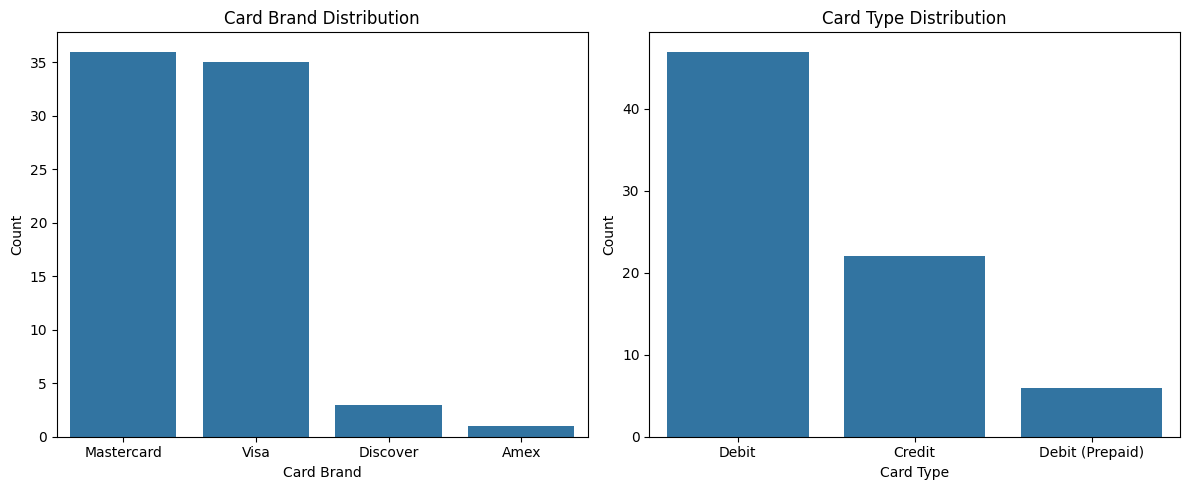

In [27]:
# Count of Card Brands
brand_counts = cards_df['card_brand'].value_counts()
print("Card Brand Distribution:\n", brand_counts)

# Count of Card Types
type_counts = cards_df['card_type'].value_counts()
print("\nCard Type Distribution:\n", type_counts)

# Credit limit
credit_limit_counts = cards_df['credit_limit'].value_counts(ascending=False)
print("\ncredit limit Distribution:\n", credit_limit_counts)

plt.figure(figsize=(12,5))

# Bar chart: Card Brands
plt.subplot(1,2,1)
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title("Card Brand Distribution")
plt.xlabel("Card Brand")
plt.ylabel("Count")

# Bar chart: Card Types
plt.subplot(1,2,2)
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title("Card Type Distribution")
plt.xlabel("Card Type")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

Brand-wise Credit Card Summary (Rounded):


,card_brand,avg_credit_limit,client_count
3,Visa,17800.0,11
1,Discover,11933.0,3
2,Mastercard,9850.0,4
0,Amex,8800.0,1


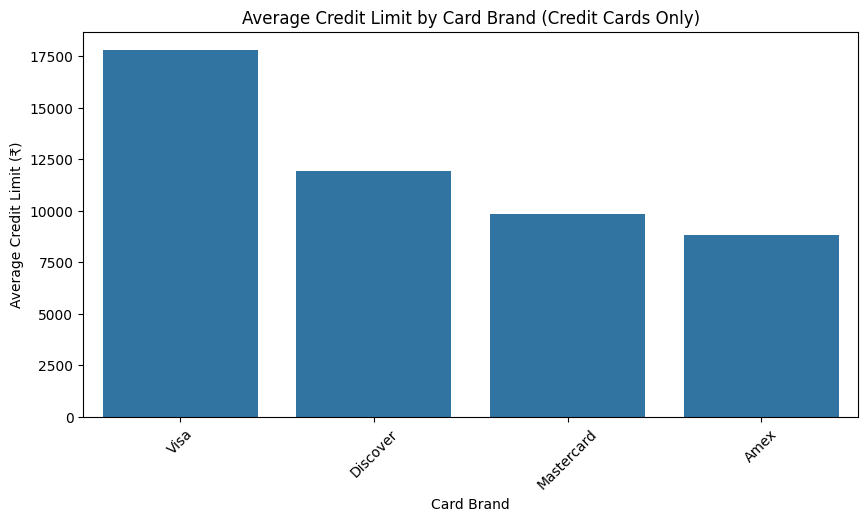

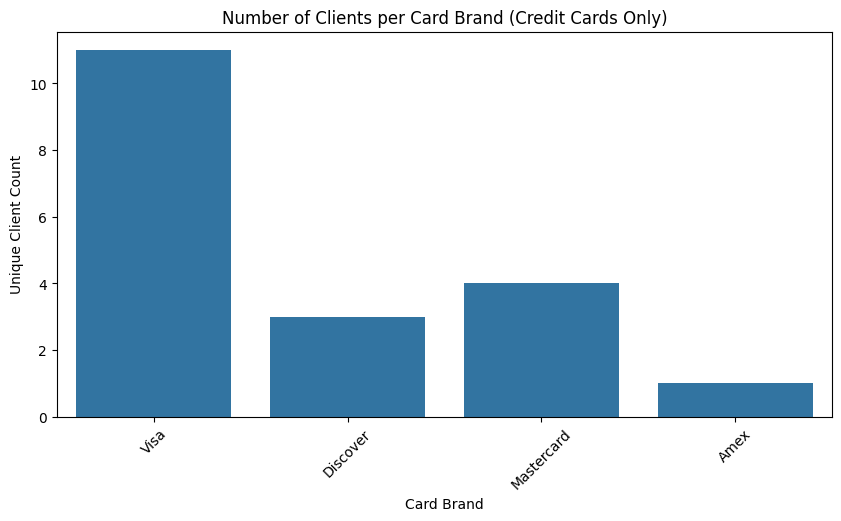

In [31]:
# Step 1: Filter only credit cards
credit_cards = cards_df[cards_df['card_type'].str.lower() == 'credit']

# Step 2: Group by card_brand
brand_summary = (
    credit_cards.groupby('card_brand')
    .agg(
        avg_credit_limit=('credit_limit', 'mean'),
        client_count=('client_id', pd.Series.nunique)
    )
    .reset_index()
    .sort_values(by='avg_credit_limit', ascending=False)
)

# Step 3: Average credit limit
brand_summary['avg_credit_limit'] = brand_summary['avg_credit_limit'].round(0)

print("Brand-wise Credit Card Summary (Rounded):")
display(brand_summary)

# Step 4: Visualizations
fig, ax1 = plt.subplots(figsize=(10,5))
sns.barplot(x='card_brand', y='avg_credit_limit', data=brand_summary, ax=ax1)
plt.title("Average Credit Limit by Card Brand (Credit Cards Only)")
plt.xlabel("Card Brand")
plt.ylabel("Average Credit Limit (₹)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='card_brand', y='client_count', data=brand_summary)
plt.title("Number of Clients per Card Brand (Credit Cards Only)")
plt.xlabel("Card Brand")
plt.ylabel("Unique Client Count")
plt.xticks(rotation=45)
plt.show()

Brand-wise Debit Card Summary (Rounded):


,card_brand,avg_credit_limit,client_count
1,Visa,33148.0,15
0,Mastercard,21423.0,16


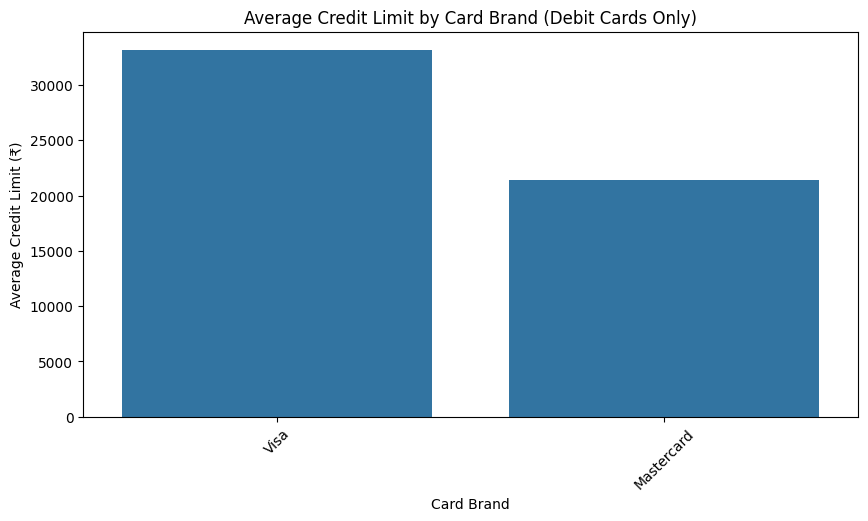

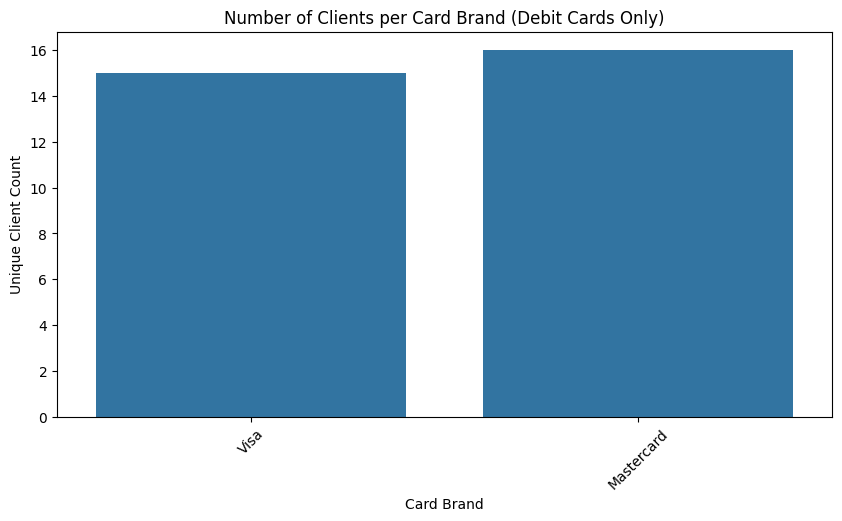

In [33]:
# Step 5: Filter only debit cards
debit_cards = cards_df[cards_df['card_type'].str.lower() == 'debit']

# Step 6: Group by card_brand
brand_summary_debit = (
    debit_cards.groupby('card_brand')
    .agg(
        avg_credit_limit=('credit_limit', 'mean'),
        client_count=('client_id', pd.Series.nunique)
    )
    .reset_index()
    .sort_values(by='avg_credit_limit', ascending=False)
)

# Step 7: Average credit limit
brand_summary_debit['avg_credit_limit'] = brand_summary_debit['avg_credit_limit'].round(0)

print("Brand-wise Debit Card Summary (Rounded):")
display(brand_summary_debit)

# Step 8: Visualizations
fig, ax1 = plt.subplots(figsize=(10,5))
sns.barplot(x='card_brand', y='avg_credit_limit', data=brand_summary_debit, ax=ax1)
plt.title("Average Credit Limit by Card Brand (Debit Cards Only)")
plt.xlabel("Card Brand")
plt.ylabel("Average Credit Limit (₹)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='card_brand', y='client_count', data=brand_summary_debit)
plt.title("Number of Clients per Card Brand (Debit Cards Only)")
plt.xlabel("Card Brand")
plt.ylabel("Unique Client Count")
plt.xticks(rotation=45)
plt.show()

# **Insights – Customer Card Profile**
* Visa and Mastercard dominate overall card issuance.

* Visa has the highest average credit limit (17.8K) among credit cards and serves the most clients.

* Visa has the highest average credit limit (33.1K) among debit cards and serves the second most clients after Mastercard.

* Mastercard leads in total card count but lags in credit segment strength.
Majority of portfolio (≈60%) are Debit cards → potential untapped opportunity for credit conversions.

# **Recommendation**

   Focus on Visa for premium campaigns; introduce Mastercard credit upgrade offers for existing debit users.

**2. Explore Transactions:**

• What is the time frame of the data collected

• Which client has spent the most amount.

• Highest and lowest transactions amounts spent

• Transactions amounts within use_chip category

• Use appropriate Graphs and extract insights.

TRANSACTION DATA CLEANING
Valid transactions retained: 49145 of 50000 total rows
Removed transactions with errors: 855

Data covers transactions from 2010-01-01 to 2012-10-29

Top spender: Client 708.0 with total spend = ₹317,316.22
Highest single transaction: ₹6,820.20
Lowest single transaction: ₹-500.00

Total Spend by Transaction Type:


/tmp/ipython-input-1939203425.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_txns_df['date'] = pd.to_datetime(valid_txns_df['date'], errors='coerce')


,use_chip,amount
1,swipe,2089892.66
0,online,426442.55


/tmp/ipython-input-1939203425.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='client_id', y='amount', data=top10, palette='viridis')


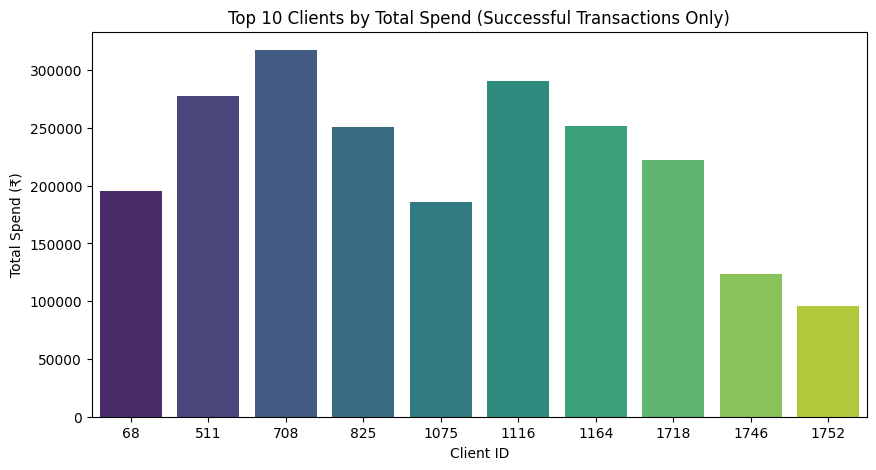

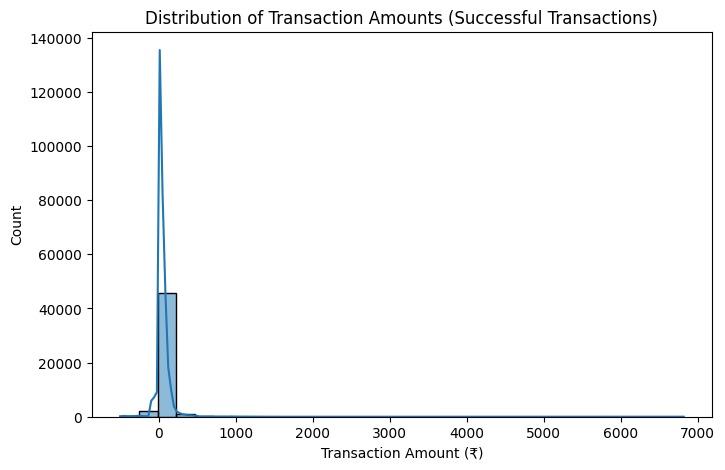

/tmp/ipython-input-1939203425.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='use_chip', y='amount', data=chip_spend, palette='Set2')


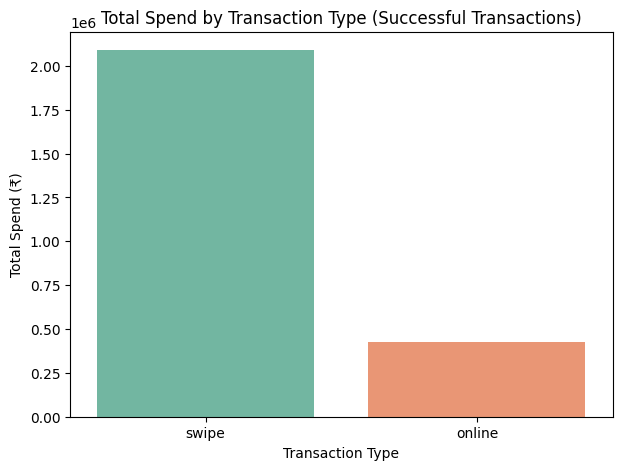

In [34]:
# Keep only successful transactions
valid_txns_df = transactions_df[transactions_df['errors'].str.lower() == "none"]

# Summary of filtering
print("TRANSACTION DATA CLEANING")
print(f"Valid transactions retained: {len(valid_txns_df)} of {len(transactions_df)} total rows")
print(f"Removed transactions with errors: {len(transactions_df) - len(valid_txns_df)}")
print()


valid_txns_df['date'] = pd.to_datetime(valid_txns_df['date'], errors='coerce')

min_date = valid_txns_df['date'].min()
max_date = valid_txns_df['date'].max()
print(f"Data covers transactions from {min_date.date()} to {max_date.date()}")
print()


client_spend = (
    valid_txns_df.groupby('client_id')['amount']
    .sum()
    .reset_index()
    .sort_values(by='amount', ascending=False)
)

top_spender = client_spend.iloc[0]
print(f"Top spender: Client {top_spender.client_id} with total spend = ₹{top_spender.amount:,.2f}")

max_txn = valid_txns_df['amount'].max()
min_txn = valid_txns_df['amount'].min()
print(f"Highest single transaction: ₹{max_txn:,.2f}")
print(f"Lowest single transaction: ₹{min_txn:,.2f}")
print()


chip_spend = (
    valid_txns_df.groupby('use_chip')['amount']
    .sum()
    .reset_index()
    .sort_values(by='amount', ascending=False)
)

print("Total Spend by Transaction Type:")
display(chip_spend)


plt.figure(figsize=(10,5))
top10 = client_spend.head(10)
sns.barplot(x='client_id', y='amount', data=top10, palette='viridis')
plt.title("Top 10 Clients by Total Spend (Successful Transactions Only)")
plt.xlabel("Client ID")
plt.ylabel("Total Spend (₹)")
plt.show()


plt.figure(figsize=(8,5))
sns.histplot(valid_txns_df['amount'], bins=30, kde=True)
plt.title("Distribution of Transaction Amounts (Successful Transactions)")
plt.xlabel("Transaction Amount (₹)")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(7,5))
sns.barplot(x='use_chip', y='amount', data=chip_spend, palette='Set2')
plt.title("Total Spend by Transaction Type (Successful Transactions)")
plt.xlabel("Transaction Type")
plt.ylabel("Total Spend (₹)")
plt.show()

# **INSIGHTS SUMMARY : Explore Transactions**
• Time frame of Transactions : 2010-01-01 → 2012-10-29

• Top spender: Client 708.0 with ₹317,316

• Transaction range from Lowest to Highest: ₹500 – ₹6,820

• Spend by transaction type within use-chip category:
   - Swipe     : ₹2,089,893
   - Online    : ₹426,443

**3. Customer Spend Profile vs. Credit Health:**

* For each client_id, compute: total spend, average ticket size, transaction
count, and monthly frequency.

 • Create a dataframe for credit_score, yearly_income, total_debt,
num_credit_cards.

 • Visualize their co-operation.

 • Plot Scatter of average amount spent vs yearly_income.

Client-level Spend Profile:


/tmp/ipython-input-3778583564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_txns_df['date'] = pd.to_datetime(valid_txns_df['date'], errors='coerce')


,client_id,total_spend,avg_ticket_size,txn_count,monthly_txn_freq
0,68,195655.68,56.547884,3460,101.76
1,153,67956.10,54.803306,1240,36.47
2,511,277212.88,43.172852,6421,188.85
3,708,317316.22,130.636566,2429,71.44
4,825,250724.70,80.489470,3115,91.62



Merged Spend + Credit Health Data:


,client_id,total_spend,avg_ticket_size,txn_count,monthly_txn_freq,yearly_income,total_debt,credit_score,num_credit_cards
0,68,195655.68,56.547884,3460,101.76,41997.0,0.0,704,3
1,153,67956.10,54.803306,1240,36.47,27484.0,16803.0,660,4
2,511,277212.88,43.172852,6421,188.85,35602.0,55369.0,661,5
3,708,317316.22,130.636566,2429,71.44,249925.0,202328.0,722,4
4,825,250724.70,80.489470,3115,91.62,59696.0,127613.0,787,5


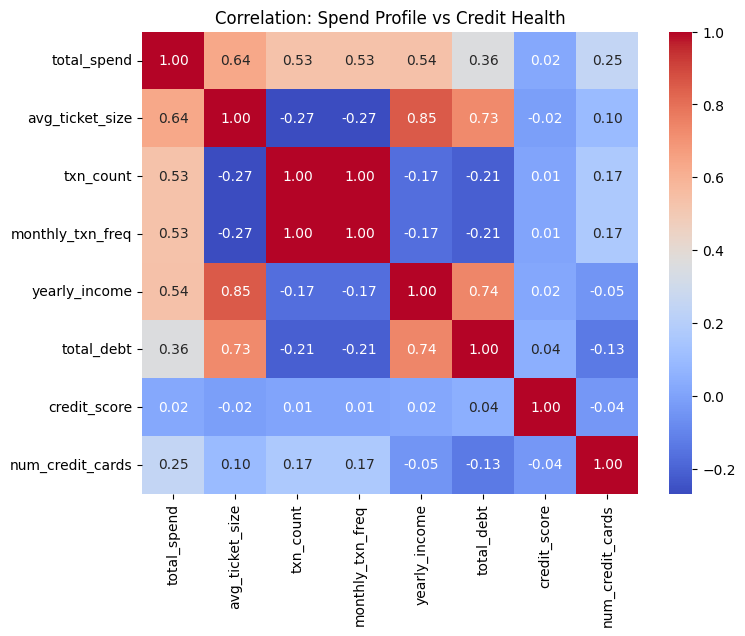

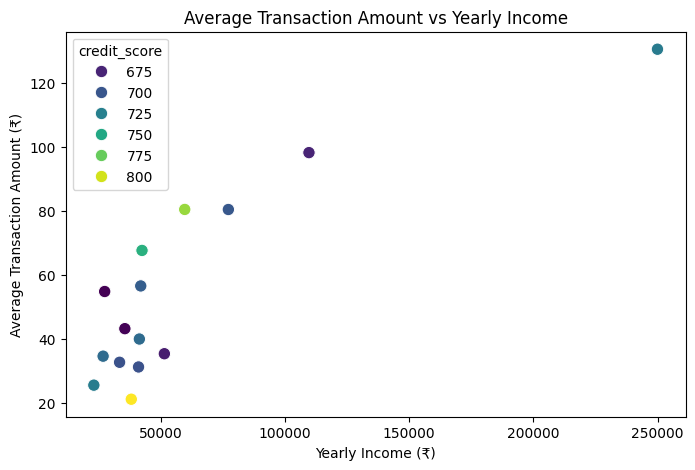

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
client_id,15.0,1147.333333,603.121957,68.000000,766.500000,1116.000000,1696.000000,1946.000000
total_spend,15.0,167755.680667,96945.871640,47837.010000,73599.015000,186067.490000,251104.590000,317316.220000
avg_ticket_size,15.0,55.486056,30.833561,21.088423,33.607651,43.172852,74.063221,130.636566
txn_count,15.0,3276.333333,1815.347455,1240.000000,1827.000000,2559.000000,4418.000000,6792.000000
monthly_txn_freq,15.0,96.362000,53.390947,36.470000,53.735000,75.260000,129.940000,199.760000
yearly_income,15.0,59990.600000,57028.403248,23123.000000,34542.500000,41442.000000,55598.000000,249925.000000
total_debt,15.0,72039.933333,74182.920378,0.000000,8162.000000,55369.000000,114949.500000,202328.000000
credit_score,15.0,712.666667,43.213203,660.000000,686.500000,704.000000,722.500000,810.000000
num_credit_cards,15.0,3.600000,1.594634,1.000000,2.500000,4.000000,5.000000,6.000000


In [36]:
# Use only valid transactions
valid_txns_df['date'] = pd.to_datetime(valid_txns_df['date'], errors='coerce')

# Calculate number of months covered by data
n_months = ((valid_txns_df['date'].max().year - valid_txns_df['date'].min().year) * 12 +
            (valid_txns_df['date'].max().month - valid_txns_df['date'].min().month) + 1)

# Aggregate spending metrics
spend_profile = (
    valid_txns_df.groupby('client_id')
    .agg(
        total_spend=('amount', 'sum'),
        avg_ticket_size=('amount', 'mean'),
        txn_count=('amount', 'count')
    )
    .reset_index()
)

# Add monthly frequency
spend_profile['monthly_txn_freq'] = (spend_profile['txn_count'] / n_months).round(2)

print("Client-level Spend Profile:")
display(spend_profile.head())

# Join with User Credit & Financial Data
credit_health = users_df[['id', 'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards']]
credit_health = credit_health.rename(columns={'id': 'client_id'})

# Merge
client_analysis = pd.merge(spend_profile, credit_health, on='client_id', how='left')

print("\nMerged Spend + Credit Health Data:")
display(client_analysis.head())

# Correlation Visualization
plt.figure(figsize=(8,6))
sns.heatmap(
    client_analysis[['total_spend', 'avg_ticket_size', 'txn_count', 'monthly_txn_freq',
                     'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards']].corr(),
    annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title("Correlation: Spend Profile vs Credit Health")
plt.show()

# Scatter Plot – Avg Spend vs Yearly Income
plt.figure(figsize=(8,5))
sns.scatterplot(x='yearly_income', y='avg_ticket_size', data=client_analysis, hue='credit_score', palette='viridis', s=80)
plt.title("Average Transaction Amount vs Yearly Income")
plt.xlabel("Yearly Income (₹)")
plt.ylabel("Average Transaction Amount (₹)")
plt.show()

# Summary Stats
print("Summary Statistics:")
display(client_analysis.describe().T)

**4. Age Portfolio:**

• Create appropriate age bands. What share of customers falls in each age
band? How does the average credit_limit vary by band?

• Visualize age vs chip_usage, income and credit score.

• Extract insights and recommend actions.

• Are young customers online heavy?

Customer Share by Age Band (%):
age_band
18–25     4.347826
26–35    26.086957
36–45    21.739130
46–55    17.391304
56–65     4.347826
65+      26.086957
Name: proportion, dtype: float64


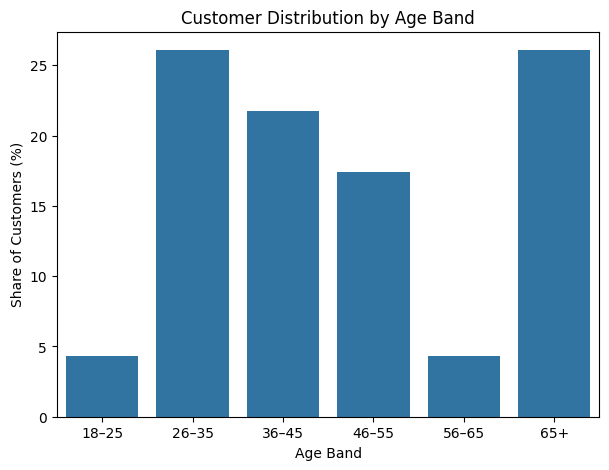

/tmp/ipython-input-2450621696.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_credit_by_age = age_credit.groupby('age_band')['credit_limit'].mean().reset_index()


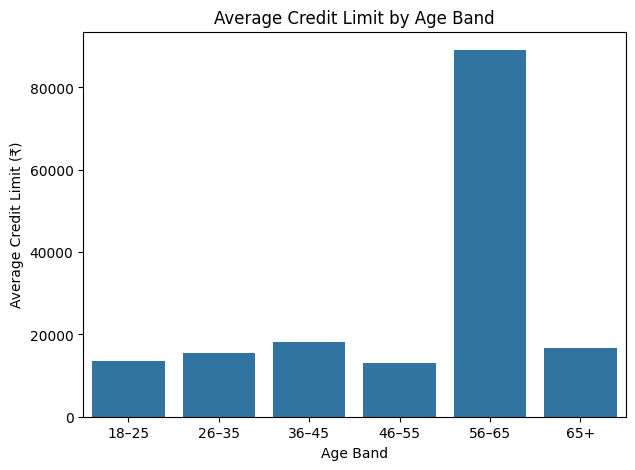


Average Credit Limit by Age Band:


,age_band,credit_limit
0,18–25,13438.0
1,26–35,15394.0
2,36–45,18056.0
3,46–55,13105.0
4,56–65,89081.0
5,65+,16715.0


/tmp/ipython-input-2450621696.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  txn_age.groupby(['age_band', 'use_chip'])


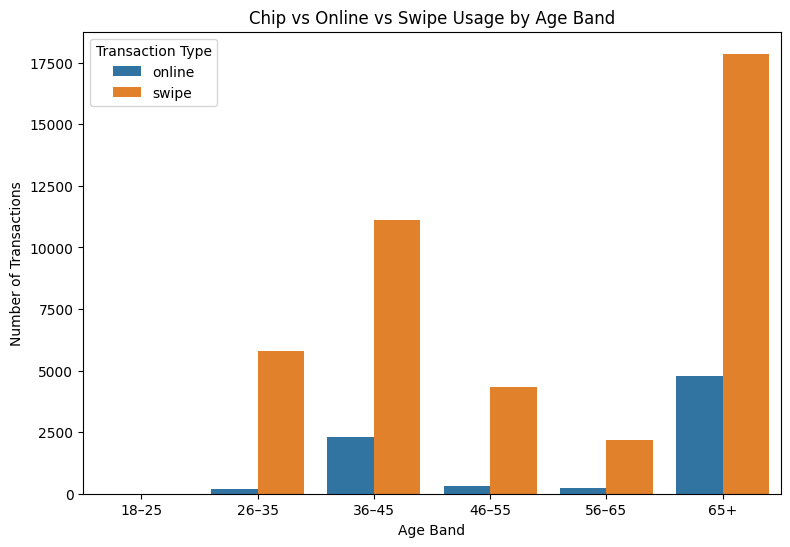

/tmp/ipython-input-2450621696.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  users_df.groupby('age_band')[['yearly_income', 'credit_score']].mean().reset_index()


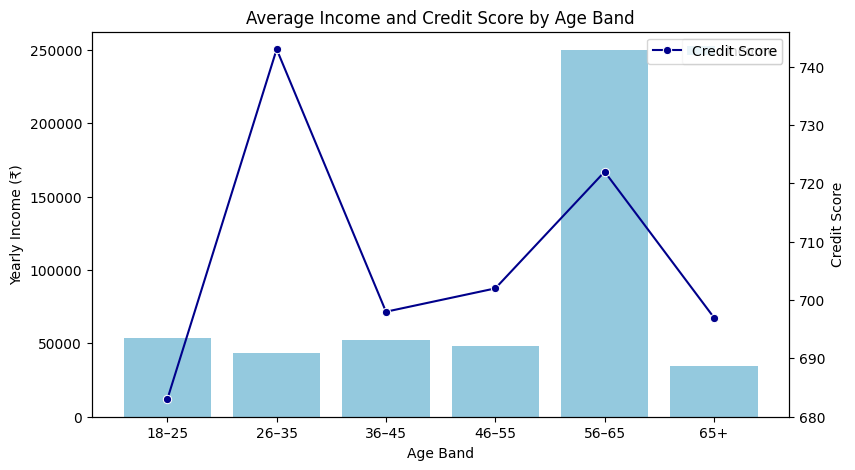


Average Income & Credit Score by Age Band:


,age_band,yearly_income,credit_score
0,18–25,53995.0,683.0
1,26–35,43545.0,743.0
2,36–45,52247.0,698.0
3,46–55,48490.0,702.0
4,56–65,249925.0,722.0
5,65+,34508.0,697.0


In [37]:
# Create Age Bands
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18–25', '26–35', '36–45', '46–55', '56–65', '65+']
users_df['age_band'] = pd.cut(users_df['current_age'], bins=bins, labels=labels, right=True)

# Share of customers per age band
age_band_share = users_df['age_band'].value_counts(normalize=True).sort_index() * 100
print("Customer Share by Age Band (%):")
print(age_band_share)

plt.figure(figsize=(7,5))
sns.barplot(x=age_band_share.index, y=age_band_share.values)
plt.title("Customer Distribution by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Share of Customers (%)")
plt.show()

# Merge credit limit (cards) with users
credit_by_client = cards_df.groupby('client_id')['credit_limit'].mean().reset_index()
age_credit = pd.merge(users_df, credit_by_client, left_on='id', right_on='client_id', how='left')

# Average credit limit per age band
avg_credit_by_age = age_credit.groupby('age_band')['credit_limit'].mean().reset_index()
avg_credit_by_age['credit_limit'] = avg_credit_by_age['credit_limit'].round(0)

plt.figure(figsize=(7,5))
sns.barplot(x='age_band', y='credit_limit', data=avg_credit_by_age)
plt.title("Average Credit Limit by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Average Credit Limit (₹)")
plt.show()

print("\nAverage Credit Limit by Age Band:")
display(avg_credit_by_age)

#  Analyze chip/online usage by age group
# Use only valid transactions and join user age
valid_txns_df = transactions_df[transactions_df['errors'].str.lower() == "none"].copy()
txn_age = valid_txns_df.merge(users_df[['id', 'age_band']], left_on='client_id', right_on='id', how='left')

chip_usage_by_age = (
    txn_age.groupby(['age_band', 'use_chip'])
    .size()
    .reset_index(name='txn_count')
)

plt.figure(figsize=(9,6))
sns.barplot(x='age_band', y='txn_count', hue='use_chip', data=chip_usage_by_age)
plt.title("Chip vs Online vs Swipe Usage by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Number of Transactions")
plt.legend(title="Transaction Type")
plt.show()

# Income and Credit Score by Age Band
income_credit_age = (
    users_df.groupby('age_band')[['yearly_income', 'credit_score']].mean().reset_index()
)
income_credit_age['yearly_income'] = income_credit_age['yearly_income'].round(0)
income_credit_age['credit_score'] = income_credit_age['credit_score'].round(0)

fig, ax1 = plt.subplots(figsize=(9,5))
sns.barplot(x='age_band', y='yearly_income', data=income_credit_age, ax=ax1, color='skyblue', label='Income')
ax2 = ax1.twinx()
sns.lineplot(x='age_band', y='credit_score', data=income_credit_age, ax=ax2, color='darkblue', label='Credit Score', marker='o')

ax1.set_title("Average Income and Credit Score by Age Band")
ax1.set_xlabel("Age Band")
ax1.set_ylabel("Yearly Income (₹)")
ax2.set_ylabel("Credit Score")
plt.show()

print("\nAverage Income & Credit Score by Age Band:")
display(income_credit_age)

#**Insights – Age Portfolio**

 * Majority of customers belong to the 26–35 and 65+ segments (26% each).

 * Credit limits increase with age until 36–45 but fluctuate afterward.

 * 26–35 group shows the highest credit scores (743) despite moderate income — financially disciplined and reliable. But they are mostly 'Swipe' as Transaction mode.

 * 56–65 group stands out with very high income and credit limit — possibly senior professionals or self-employed customers.

 * Count of transactions are decreasing gardually between the age group of 45 - 65

 * **Younger users (18–25) are few but represent future growth potential; they are low in income and credit limits and they are hardly using 'online' mode of transaction.**


 # **Recommendation :**

  *  Age group of (26-35) should be offered more reward points  to attract for online transactions.
  *  Age group of (56-65) should be targeted with lucrative offers to use credit cards as the mode of transaction as they are having the highest yearly income but with sharply declining transaction volume. They also have a very good credit score.

**5. Gender Analysis:**

• Avg transaction amount by gender.

• Time-of-day / day-of-week profiles: does one group spend more at
night/weekends?

• Visualize with appropriate graphs.

• Suggest marketing campaign ideas.

Average Transaction Amount by Gender:


,gender,amount
0,Female,51.29
1,Male,51.04


/tmp/ipython-input-912509165.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='amount', data=avg_txn_by_gender, palette='Set2')


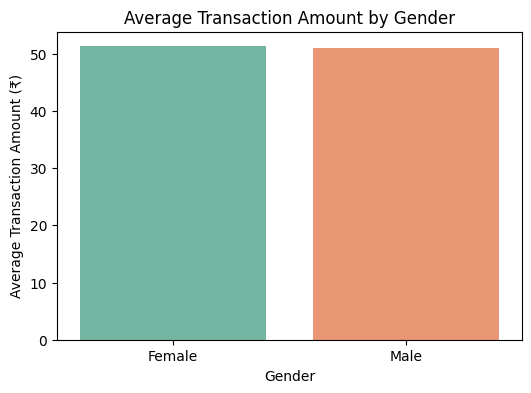

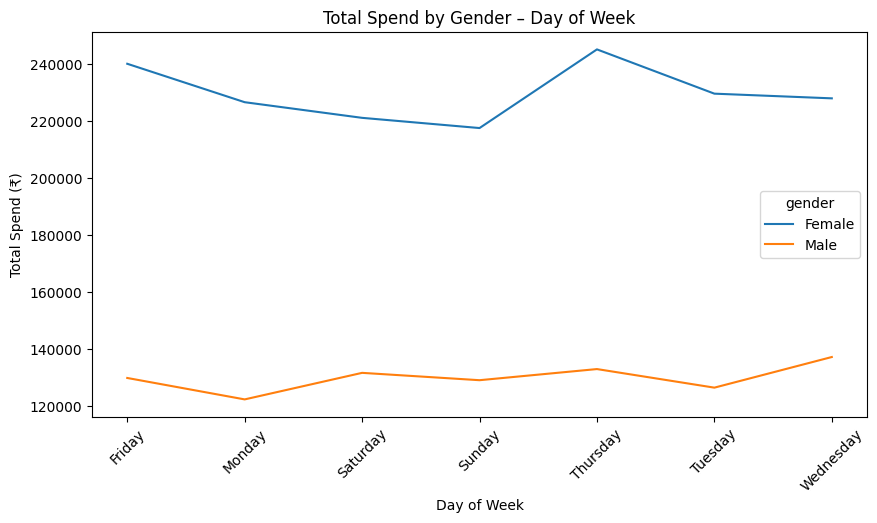

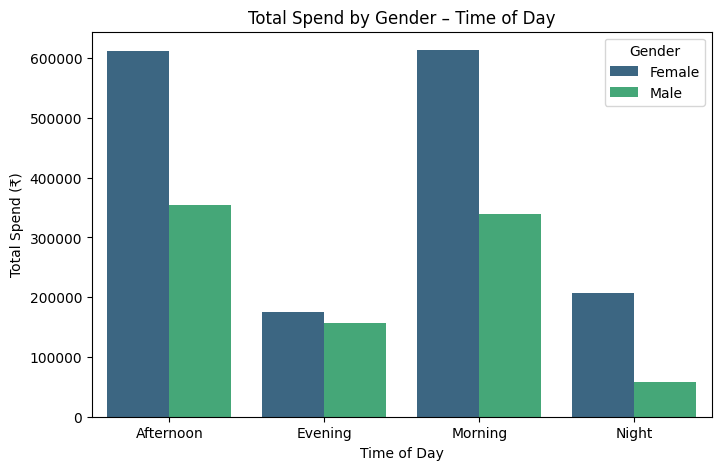

Quick Summary
Average transaction by gender:
   gender  amount
0  Female   51.29
1    Male   51.04

Top spending times (Day-of-week and Time-of-day):


,gender,day_of_week,amount
4,Female,Thursday,244986.42
0,Female,Friday,239949.67
5,Female,Tuesday,229471.67
6,Female,Wednesday,227828.06
1,Female,Monday,226478.18


,gender,time_of_day,amount
2,Female,Morning,613589.08
0,Female,Afternoon,611941.18
4,Male,Afternoon,353526.67
6,Male,Morning,339897.83
3,Female,Night,206982.52


In [39]:
valid_txns_df = transactions_df[transactions_df['errors'].str.lower() == "none"].copy()
valid_txns_df['date'] = pd.to_datetime(valid_txns_df['date'], errors='coerce')

txn_gender = valid_txns_df.merge(
    users_df[['id', 'gender']],
    left_on='client_id',
    right_on='id',
    how='left'
)

# Extract Time and Day Features
txn_gender['hour'] = txn_gender['date'].dt.hour
txn_gender['day_of_week'] = txn_gender['date'].dt.day_name()

# Average Transaction Amount by Gender
avg_txn_by_gender = txn_gender.groupby('gender')['amount'].mean().reset_index()
avg_txn_by_gender['amount'] = avg_txn_by_gender['amount'].round(2)
print("Average Transaction Amount by Gender:")
display(avg_txn_by_gender)

plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='amount', data=avg_txn_by_gender, palette='Set2')
plt.title("Average Transaction Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Transaction Amount (₹)")
plt.show()

# Day-of-Week Spend Pattern
dow_spend = txn_gender.groupby(['gender', 'day_of_week'])['amount'].sum().reset_index()
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(10,5))
sns.lineplot(x='day_of_week', y='amount', hue='gender', data=dow_spend, sort=False, markers=True)
plt.title("Total Spend by Gender – Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Spend (₹)")
plt.xticks(rotation=45)
plt.show()

# Time-of-Day Spend Pattern
# Define time categories
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

txn_gender['time_of_day'] = txn_gender['hour'].apply(get_time_of_day)

time_spend = txn_gender.groupby(['gender', 'time_of_day'])['amount'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='time_of_day', y='amount', hue='gender', data=time_spend, palette='viridis')
plt.title("Total Spend by Gender – Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Total Spend (₹)")
plt.legend(title="Gender")
plt.show()

# Insights Summary
print("Quick Summary")
print(f"Average transaction by gender:\n{avg_txn_by_gender}")
print("\nTop spending times (Day-of-week and Time-of-day):")
display(dow_spend.sort_values(by='amount', ascending=False).head(5))
display(time_spend.sort_values(by='amount', ascending=False).head(5))

# **Insights – Gender Analysis**
 * Average spend per transaction is almost identical for both genders (~51), with females slightly higher.

 * Female users dominate total spend volume and transact more frequently, especially on weekdays.

 * Morning and afternoon hours are the busiest for both genders, but females spend significantly more in these slots.

 * Evening and night hours see lower transaction activity across all users.

# **Marketing Campaign Ideas – Gender Analysis**
 * Target female customers with weekday midday offers and loyalty rewards.

 * Launch evening flash campaigns (6–10 PM) to lift low activity hours.

 * Promote weekday cashback programs for male customers focusing on essential spends (fuel, utilities, food).

 * Introduce category-based incentives (grocery, fashion, digital payments) where females already show high engagement.